In [1]:
from collections import defaultdict
import pickle
import pandas as pd
import numpy as np
import OSU
import matplotlib.pyplot as plt
import logomaker

# pull out top 10k resistant and bottom 10k resistant sequences across both backbones, between DMSO and 12.5 uM

# Load JTE607 data from both backbones individually
# Filter based off of DMSO reads per variant

# L3 loading and counting reads, filter away variants with < 50 reads in DMSO
L3_shared_5p = "GCGAATTGGAGCTCTTCTTTTTGTCACTTGAAAAACATGTAAAAATAATGTACTAGGAGACACTTTCAATAAA"
L3_shared_3p = "TCGGGTGATTATTTACCCCCCACCCTTGCCGTCTGCGAGAATTCGAT"
parsed_L3_cleaved_output_dir = "/JTE-607/Analysis/parsed_L3_input_RNA_clusterPASRandom_bbmerge_xloose/parsed_L3_cleaved_RNA_multimapping_mincov1_preload_bbmerge_xloose_H1shortN4indel/collapsed/"
polyA_L3_DMSO_cleaved_pickle = parsed_L3_cleaved_output_dir + "L3_DMSO_polya_pos_dict.pickle"
polyA_L3_12p5uM_cleaved_pickle = parsed_L3_cleaved_output_dir + "L3_12p5uM_polya_pos_dict.pickle"

L3_polyA_pos_pickle_dict = {"L3_DMSO": polyA_L3_DMSO_cleaved_pickle,\
              "L3_12p5uM": polyA_L3_12p5uM_cleaved_pickle}

L3_PAS_read_counts = defaultdict(int)
polya_pos_dict = pickle.load(open(polyA_L3_DMSO_cleaved_pickle, "rb"))
data_name = "L3_DMSO"
for curr_PAS, curr_polya_pos_count_dict in polya_pos_dict.items():
    curr_total_reads = sum(curr_polya_pos_count_dict.values())
    curr_PAS = curr_PAS.strip()
    if curr_total_reads >= 50:
        L3_PAS_read_counts[curr_PAS] += curr_total_reads

# SVLst loading and counting reads, filter away variants with < 50 reads in DMSO
SVLst_shared_5p = "GCGAATTGGAGCTCATGCTTTATTTGTGAAATTTGTGATGCTATTGCTTTATTTGTAACCATTATAAGCTGCAATAAA"
SVLst_shared_3p = "ATTTTATGTTTCAGGTTCAGGGGGAGGTGTGGGAGGTTTTTTAAAGCAAGTAGAATTCGAT"
parsed_SVLst_cleaved_output_dir = "/JTE-607/Analysis/parsed_SVLst_input_RNA_clusterPASRandom_bbmerge_xloose/parsed_SVLst_cleaved_RNA_multimapping_mincov1_preload_bbmerge_xloose_H1shortN4indel/collapsed/"
polyA_SVLst_DMSO_cleaved_pickle = parsed_SVLst_cleaved_output_dir + "SVLst_DMSO_polya_pos_dict.pickle"
polyA_SVLst_12p5uM_cleaved_pickle = parsed_SVLst_cleaved_output_dir + "SVLst_12p5uM_polya_pos_dict.pickle"

SVLst_polyA_pos_pickle_dict = {"SVLst_DMSO": polyA_SVLst_DMSO_cleaved_pickle,\
              "SVLst_12p5uM": polyA_SVLst_12p5uM_cleaved_pickle}

SVLst_PAS_read_counts = defaultdict(int)
polya_pos_dict = pickle.load(open(polyA_SVLst_DMSO_cleaved_pickle, "rb"))
data_name = "SVLst_DMSO"
for curr_PAS, curr_polya_pos_count_dict in polya_pos_dict.items():
    curr_total_reads = sum(curr_polya_pos_count_dict.values())
    curr_PAS = curr_PAS.strip()
    if curr_total_reads >= 50:
        SVLst_PAS_read_counts[curr_PAS] += curr_total_reads

# combine L3 and SVLst, calculate percentages within each dataset
L3_PAS_percents_dict = {"L3_DMSO": None,\
              "L3_12p5uM": None}
SVLst_PAS_percents_dict = {"SVLst_DMSO": None,\
              "SVLst_12p5uM": None}

all_PAS = set()
for data_name, pickle_name in L3_polyA_pos_pickle_dict.items():
    polya_pos_dict = pickle.load(open(pickle_name, "rb"))
    PAS_read_counts = defaultdict(int)
    for curr_PAS, curr_polya_pos_count_dict in polya_pos_dict.items():
        if curr_PAS in L3_PAS_read_counts:
            curr_total_reads = sum(curr_polya_pos_count_dict.values())
            curr_PAS = L3_shared_5p + curr_PAS + L3_shared_3p
            PAS_read_counts[curr_PAS] += curr_total_reads
            all_PAS.add(curr_PAS)
    total_reads = float(sum(PAS_read_counts.values()))  # float for division later
    print("%s total_reads = " % (data_name), total_reads)
    percentage_dict = {curr_PAS:(curr_read_count/total_reads) for curr_PAS, curr_read_count in PAS_read_counts.items()}
    df = pd.DataFrame(list(percentage_dict.items()),columns = ['PAS', data_name.split("_")[1] + '_percent'])
    L3_PAS_percents_dict[data_name] = df

for data_name, pickle_name in SVLst_polyA_pos_pickle_dict.items():
    polya_pos_dict = pickle.load(open(pickle_name, "rb"))
    PAS_read_counts = defaultdict(int)
    for curr_PAS, curr_polya_pos_count_dict in polya_pos_dict.items():
        if curr_PAS in SVLst_PAS_read_counts:
            curr_total_reads = sum(curr_polya_pos_count_dict.values())
            curr_PAS = SVLst_shared_5p + curr_PAS + SVLst_shared_3p
            PAS_read_counts[curr_PAS] += curr_total_reads
            all_PAS.add(curr_PAS)
    total_reads = float(sum(PAS_read_counts.values()))  # float for division later
    print("%s total_reads = " % (data_name), total_reads)
    percentage_dict = {curr_PAS:(curr_read_count/total_reads) for curr_PAS, curr_read_count in PAS_read_counts.items()}
    df = pd.DataFrame(list(percentage_dict.items()),columns = ['PAS', data_name.split("_")[1] + '_percent'])
    SVLst_PAS_percents_dict[data_name] = df

print(len(all_PAS))

merged_PAS_percentage_L3 = None
for data_name, curr_df in L3_PAS_percents_dict.items():
    if merged_PAS_percentage_L3 is None:
        merged_PAS_percentage_L3 = curr_df
    else:
        merged_PAS_percentage_L3 = merged_PAS_percentage_L3.merge(curr_df, how='outer', on="PAS")
merged_PAS_percentage_L3 = merged_PAS_percentage_L3.fillna(0)
print(merged_PAS_percentage_L3.shape)
print("Unsorted merged_PAS_percentage_L3: ", merged_PAS_percentage_L3)
merged_PAS_percentage_L3 = merged_PAS_percentage_L3.set_index("PAS")
merged_PAS_percentage_L3.reset_index(level=0, inplace=True)

merged_PAS_percentage_SVLst = None
for data_name, curr_df in SVLst_PAS_percents_dict.items():
    if merged_PAS_percentage_SVLst is None:
        merged_PAS_percentage_SVLst = curr_df
    else:
        merged_PAS_percentage_SVLst = merged_PAS_percentage_SVLst.merge(curr_df, how='outer', on="PAS")
merged_PAS_percentage_SVLst = merged_PAS_percentage_SVLst.fillna(0)
print(merged_PAS_percentage_SVLst.shape)
print("Unsorted merged_PAS_percentage_SVLst: ", merged_PAS_percentage_SVLst)
merged_PAS_percentage_SVLst = merged_PAS_percentage_SVLst.set_index("PAS")
merged_PAS_percentage_SVLst.reset_index(level=0, inplace=True)

merged_PAS_percentage = pd.concat([merged_PAS_percentage_L3, merged_PAS_percentage_SVLst])
print("Unsorted merged_PAS_percentage: ", merged_PAS_percentage)

# sort merged datasets based on DMSO percentages
merged_PAS_percentage = merged_PAS_percentage.sort_values(by=["DMSO_percent"], ascending=False)
print("Sorted merged_PAS_percentage: ", merged_PAS_percentage)

# Normalize based on variant
PAS_percentage_normalized = merged_PAS_percentage.drop("PAS", 1)
PAS_percentage_normalized = PAS_percentage_normalized.div(PAS_percentage_normalized.sum(axis=1), axis=0)
PAS_percentage_normalized["PAS"] = merged_PAS_percentage["PAS"]
print("PAS_percentage_normalized: ", PAS_percentage_normalized)

# Sorting based on 12.5 uM and write out top 10000 "resistant" and "sensitive"
descending_PAS_percentage = PAS_percentage_normalized.sort_values(by=["12p5uM_percent"], ascending=False)
print("Descending 12p5uM_percent: ", descending_PAS_percentage)

# Take top 10000 resistant variants
resistant_10k_variants = descending_PAS_percentage.head(10000)
print("resistant_10k_variants: ", resistant_10k_variants)

# Take top 10000 sensitive variants
sensitive_10k_variants = descending_PAS_percentage.tail(10000)
print("sensitive_10k_variants: ", sensitive_10k_variants)

output_dir = OSU.create_directory("/JTE-607/Analysis/combined_backbones_mincov1_H1shortN4indel/Figure_S4/")

resistant_10k_variants.to_csv(output_dir + "top_10k_resistant_mincov50_allCutSites.txt", sep="\t")
sensitive_10k_variants.to_csv(output_dir + "top_10k_sensitive_mincov50_allCutSites.txt", sep="\t")


L3_DMSO total_reads =  12533775.0
L3_12p5uM total_reads =  6192004.0
SVLst_DMSO total_reads =  7688631.0
SVLst_12p5uM total_reads =  4188442.0
261316
(158298, 3)
Unsorted merged_PAS_percentage_L3:                                                        PAS  DMSO_percent  \
0       GCGAATTGGAGCTCTTCTTTTTGTCACTTGAAAAACATGTAAAAAT...      0.000006   
1       GCGAATTGGAGCTCTTCTTTTTGTCACTTGAAAAACATGTAAAAAT...      0.000008   
2       GCGAATTGGAGCTCTTCTTTTTGTCACTTGAAAAACATGTAAAAAT...      0.000007   
3       GCGAATTGGAGCTCTTCTTTTTGTCACTTGAAAAACATGTAAAAAT...      0.000004   
4       GCGAATTGGAGCTCTTCTTTTTGTCACTTGAAAAACATGTAAAAAT...      0.000010   
...                                                   ...           ...   
158293  GCGAATTGGAGCTCTTCTTTTTGTCACTTGAAAAACATGTAAAAAT...      0.000004   
158294  GCGAATTGGAGCTCTTCTTTTTGTCACTTGAAAAACATGTAAAAAT...      0.000004   
158295  GCGAATTGGAGCTCTTCTTTTTGTCACTTGAAAAACATGTAAAAAT...      0.000005   
158296  GCGAATTGGAGCTCTTCTTTTTGTCACTTGAAAAACATGTAAAA

L3_PAS_percentage_normalized:          DMSO_percent  12p5uM_percent  \
0           0.663990        0.336010   
1           0.387478        0.612522   
2           0.322764        0.677236   
3           0.562261        0.437739   
4           0.688919        0.311081   
...              ...             ...   
158293      0.473638        0.526362   
158294      0.759002        0.240998   
158295      0.476675        0.523325   
158296      0.445305        0.554695   
158297      0.656385        0.343615   

                                                      PAS  
0       GCGAATTGGAGCTCTTCTTTTTGTCACTTGAAAAACATGTAAAAAT...  
1       GCGAATTGGAGCTCTTCTTTTTGTCACTTGAAAAACATGTAAAAAT...  
2       GCGAATTGGAGCTCTTCTTTTTGTCACTTGAAAAACATGTAAAAAT...  
3       GCGAATTGGAGCTCTTCTTTTTGTCACTTGAAAAACATGTAAAAAT...  
4       GCGAATTGGAGCTCTTCTTTTTGTCACTTGAAAAACATGTAAAAAT...  
...                                                   ...  
158293  GCGAATTGGAGCTCTTCTTTTTGTCACTTGAAAAACATGTAAAAAT...  
158294  

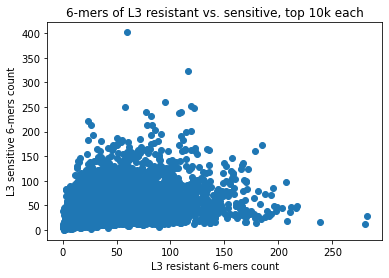

['CTCAGT', 'TCAGTA', 'CTAATA', 'TAATAT', 'ATATGA', 'TATGGA', 'CTATGT', 'TATGTG', 'ATGTGT', 'TGTGTG', 'ATCGTA', 'GTAGTT', 'TAGTTG', 'GTTGGA', 'TTGGAA', 'GAGTTC', 'AGTTCG', 'GATCAT', 'ATCATG', 'ATACTA', 'ACTTTG', 'TTTGGA', 'AATCTA', 'ATCTAT', 'CTATTT', 'TATTTG', 'ATTTGT', 'TTTGTG', 'TTGTGT', 'TGTGTT', 'GTGTTG', 'TGTTGT', 'GTTGTT', 'TATCGT', 'CTCATT', 'TCATTC', 'CGTATT', 'TATTCA', 'ATTCAG', 'TTCAGT', 'TCAGTT', 'CAGTTT', 'AGTTTA', 'GTTTAA', 'TTTAAC', 'TTAACT', 'TAACTT', 'ACTTGT', 'CTTGTT', 'TTGTTG', 'GTTGTC', 'TTGTCA', 'TTCAGA', 'TCAGAT', 'TAAATG', 'AAATGT', 'AATGTC', 'CACATT', 'ACATTT', 'CATTTT', 'ATTTTG', 'ATCATT', 'TCATTG', 'CATTGA', 'ATTGAC', 'CATCTT', 'GTTGCA', 'AACGTC', 'ACGTCA', 'GTCGTT', 'TACTAA', 'ACTAAA', 'CTAAAT', 'AATGTA', 'TACGTT', 'ACGTTG', 'AGAGTT', 'AGTTCA', 'GTTCAA', 'TTCAAC', 'TCAACT', 'CAACTT', 'AACTTA', 'ACTTAG', 'CTTAGT', 'TTAGTT', 'TAGTTT', 'TTCTGT', 'CTGGTT', 'TGGTTA', 'GGTTAA', 'GTTAAA', 'TTAAAC', 'TAAACT', 'AAACTT', 'AACTTT', 'ACTTTA', 'CTTTAC', 'TTTACT', 'TACTCA',

findfont: Font family ['Arial Rounded MT Bold'] not found. Falling back to DejaVu Sans.


            A         C         G         T
pos                                        
0    0.309934  0.150892  0.143629  0.395545
1    0.295125  0.150974  0.132374  0.421527
2    0.284474  0.151294  0.130916  0.433316
3    0.287175  0.150240  0.134565  0.428020
4    0.307494  0.145086  0.131651  0.415769
5    0.335952  0.130028  0.124282  0.409739
            A         C         G         T
pos                                        
0    0.163007  0.119920  0.368927  0.348146
1    0.161438  0.140283  0.337958  0.360321
2    0.172375  0.132699  0.330719  0.364207
3    0.168763  0.128310  0.348348  0.354579
4    0.180348  0.122554  0.326028  0.371071
5    0.176836  0.103629  0.344635  0.374899
resistant_significant_resistant_10k_variants_variable_6mersmult_logo


<Figure size 432x288 with 0 Axes>

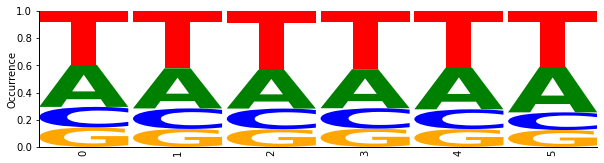

sensitive_significant_resistant_10k_variants_variable_6mersmult_logo


<Figure size 432x288 with 0 Axes>

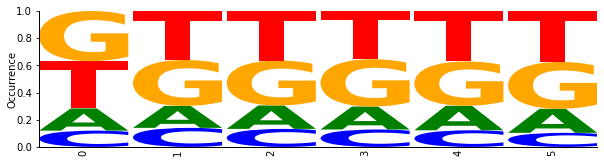

<Figure size 432x288 with 0 Axes>

In [2]:
from scipy import stats


"""
Count k-mers, not position aware
"""
def count_kmers_seqlist(sequence_list, k_len):
    kmers_count_dict = defaultdict(int)
    for sequence in sequence_list:
        for i in range(len(sequence) - k_len + 1):
            kmers_count_dict[sequence[i:(i + k_len)]] += 1
    return kmers_count_dict


def make_probabillity_df(list_seqs):
    # assume length are all the same
    str_len = len(list_seqs[0])
    counts = pd.DataFrame(np.zeros((str_len, 4)), columns = ["A", "C", "G", "T"])
    counts = counts.rename_axis("pos")
    for seq in list_seqs:
        for c, i in zip(seq, range(str_len)):
            counts.loc[i, c] += 1 
    res = counts.div(counts.sum(axis=1), axis=0)
    return res


"""
Using binomial test to find significant k-mers
"""
def find_significant_kmers(kmers_dict):
    total_kmers = sum(kmers_dict.values())
    sig_kmers_list = []
    for kmer, kmer_count in kmers_dict.items():
        p_null = pow(0.25, len(kmer))
        p_value = stats.binom_test(kmer_count, n=total_kmers, p=p_null, alternative='greater')
        if p_value <= 0.05/pow(4, len(kmer)):
            sig_kmers_list.append(kmer)
    return sig_kmers_list


# Normalize L3 data based on variant
L3_PAS_percentage_normalized = merged_PAS_percentage_L3.drop("PAS", 1)
L3_PAS_percentage_normalized = L3_PAS_percentage_normalized.div(L3_PAS_percentage_normalized.sum(axis=1), axis=0)
L3_PAS_percentage_normalized["PAS"] = merged_PAS_percentage_L3["PAS"]
print("L3_PAS_percentage_normalized: ", L3_PAS_percentage_normalized)

# Sort descending 12.5 uM percentage, aka sorted on resistance
L3_descending_PAS_percentage = L3_PAS_percentage_normalized.sort_values(by=["12p5uM_percent"], ascending=False)
print(L3_descending_PAS_percentage)

# Take top 10000 resistant variants
resistant_10k_variants = L3_descending_PAS_percentage.head(10000)
print(resistant_10k_variants)

# Take top 10000 sensitive variants
sensitive_10k_variants = L3_descending_PAS_percentage.tail(10000)
print(sensitive_10k_variants)

# Decompose n-mers for the top and bottom 10k variants
# 6-mers
resistant_10k_variants_variable_seqs = [seq[73:98] for seq in resistant_10k_variants["PAS"]]
resistant_10k_variants_variable_6mers = count_kmers_seqlist(resistant_10k_variants_variable_seqs, 6)
resistant_6mers_counts = pd.DataFrame(list(resistant_10k_variants_variable_6mers.items()),columns = ['6-mer', "resistant_count"])
print("resistant_10k_variants_variable_seqs[:10]: ", resistant_10k_variants_variable_seqs[:10])
print("sorted(resistant_10k_variants_variable_seqs)[:10]: ", sorted(resistant_10k_variants_variable_seqs)[:10])
print("resistant_6mers_counts: ", resistant_6mers_counts)

sensitive_10k_variants_variable_seqs = [seq[73:98] for seq in sensitive_10k_variants["PAS"]]
sensitive_10k_variants_variable_6mers = count_kmers_seqlist(sensitive_10k_variants_variable_seqs, 6)
sensitive_6mers_counts = pd.DataFrame(list(sensitive_10k_variants_variable_6mers.items()),columns = ['6-mer', "sensitive_count"])
print("sorted(sensitive_10k_variants_variable_seqs)[:10]: ", sorted(sensitive_10k_variants_variable_seqs)[:10])
print("sensitive_6mers_counts: ", sensitive_6mers_counts)

merged_6mers_counts = resistant_6mers_counts.merge(sensitive_6mers_counts, how='outer', on="6-mer")
merged_6mers_counts = merged_6mers_counts.fillna(0)
merged_6mers_counts.set_index("6-mer", inplace = True)
print(merged_6mers_counts)

plt.scatter(merged_6mers_counts["resistant_count"], merged_6mers_counts["sensitive_count"])
plt.title("6-mers of L3 resistant vs. sensitive, top 10k each")
plt.ylabel("L3 sensitive 6-mers count")
plt.xlabel("L3 resistant 6-mers count")
plt.savefig(output_dir + "L3_10k_variants_variable_6mers.pdf")
plt.show()
plt.clf()


resistant_significant_resistant_10k_variants_variable_6mers = find_significant_kmers(resistant_10k_variants_variable_6mers)
print(resistant_significant_resistant_10k_variants_variable_6mers)
print(len(resistant_significant_resistant_10k_variants_variable_6mers))

sensitive_significant_resistant_10k_variants_variable_6mers = find_significant_kmers(sensitive_10k_variants_variable_6mers)
print(sensitive_significant_resistant_10k_variants_variable_6mers)
print(len(sensitive_significant_resistant_10k_variants_variable_6mers))


resistant_significant_resistant_10k_variants_variable_6mersmult = list(OSU.flatten_list([[mer]*count for mer, count in resistant_10k_variants_variable_6mers.items() \
                                                                       if mer in resistant_significant_resistant_10k_variants_variable_6mers]))
sensitive_significant_resistant_10k_variants_variable_6mersmult = list(OSU.flatten_list([[mer]*count for mer, count in sensitive_10k_variants_variable_6mers.items() \
                                            if mer in sensitive_significant_resistant_10k_variants_variable_6mers]))

# Make sequence logo of probabilities in high_resistant_10k_variants_variable_8mersmult and low_resistant_10k_variants_variable_8mersmult
resistant_significant_resistant_10k_variants_variable_6mersmult_probs = make_probabillity_df(resistant_significant_resistant_10k_variants_variable_6mersmult)
sensitive_significant_resistant_10k_variants_variable_6mersmult_probs = make_probabillity_df(sensitive_significant_resistant_10k_variants_variable_6mersmult)

print(resistant_significant_resistant_10k_variants_variable_6mersmult_probs)
print(sensitive_significant_resistant_10k_variants_variable_6mersmult_probs)

print("resistant_significant_resistant_10k_variants_variable_6mersmult_logo")
# create Logo object
resistant_significant_resistant_10k_variants_variable_6mersmult_logo = logomaker.Logo(resistant_significant_resistant_10k_variants_variable_6mersmult_probs,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold')

# style using Logo methods
resistant_significant_resistant_10k_variants_variable_6mersmult_logo.style_spines(visible=False)
resistant_significant_resistant_10k_variants_variable_6mersmult_logo.style_spines(spines=['left', 'bottom'], visible=True)
resistant_significant_resistant_10k_variants_variable_6mersmult_logo.style_xticks(rotation=90, fmt='%d', anchor=0)

# style using Axes methods
resistant_significant_resistant_10k_variants_variable_6mersmult_logo.ax.set_ylabel("Occurrence", labelpad=-1)
resistant_significant_resistant_10k_variants_variable_6mersmult_logo.ax.xaxis.set_ticks_position('none')
resistant_significant_resistant_10k_variants_variable_6mersmult_logo.ax.xaxis.set_tick_params(pad=-1)

plt.savefig(output_dir + "L3_resistant_significant_10k_variants_variable_6mersmult_logo.pdf")
plt.show()
plt.clf()

print("sensitive_significant_resistant_10k_variants_variable_6mersmult_logo")
# create Logo object
sensitive_significant_resistant_10k_variants_variable_6mersmult_logo = logomaker.Logo(sensitive_significant_resistant_10k_variants_variable_6mersmult_probs,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold')

# style using Logo methods
sensitive_significant_resistant_10k_variants_variable_6mersmult_logo.style_spines(visible=False)
sensitive_significant_resistant_10k_variants_variable_6mersmult_logo.style_spines(spines=['left', 'bottom'], visible=True)
sensitive_significant_resistant_10k_variants_variable_6mersmult_logo.style_xticks(rotation=90, fmt='%d', anchor=0)

# style using Axes methods
sensitive_significant_resistant_10k_variants_variable_6mersmult_logo.ax.set_ylabel("Occurrence", labelpad=-1)
sensitive_significant_resistant_10k_variants_variable_6mersmult_logo.ax.xaxis.set_ticks_position('none')
sensitive_significant_resistant_10k_variants_variable_6mersmult_logo.ax.xaxis.set_tick_params(pad=-1)

plt.savefig(output_dir + "L3_sensitive_significant_10k_variants_variable_6mersmult_logo.pdf")
plt.show()
plt.clf()

SVLst_PAS_percentage_normalized:          DMSO_percent  12p5uM_percent  \
0           0.571433        0.428567   
1           0.632392        0.367608   
2           0.521420        0.478580   
3           0.480368        0.519632   
4           0.503944        0.496056   
...              ...             ...   
103013      0.739090        0.260910   
103014      0.540584        0.459416   
103015      0.384953        0.615047   
103016      0.884080        0.115920   
103017      0.639049        0.360951   

                                                      PAS  
0       GCGAATTGGAGCTCATGCTTTATTTGTGAAATTTGTGATGCTATTG...  
1       GCGAATTGGAGCTCATGCTTTATTTGTGAAATTTGTGATGCTATTG...  
2       GCGAATTGGAGCTCATGCTTTATTTGTGAAATTTGTGATGCTATTG...  
3       GCGAATTGGAGCTCATGCTTTATTTGTGAAATTTGTGATGCTATTG...  
4       GCGAATTGGAGCTCATGCTTTATTTGTGAAATTTGTGATGCTATTG...  
...                                                   ...  
103013  GCGAATTGGAGCTCATGCTTTATTTGTGAAATTTGTGATGCTATTG...  
10301

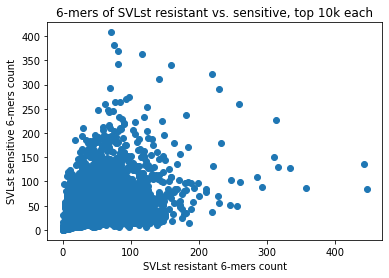

['AACATG', 'ACATGT', 'ATGTGA', 'AAAGTA', 'AAATGT', 'AATGTG', 'CTATAC', 'AACGTC', 'GATCGT', 'ATCGTA', 'CGTAAA', 'GTAAAA', 'AAAAGG', 'AAAGGC', 'AAGGCA', 'ACGTCA', 'ACGTTG', 'CGTTGA', 'GTTGAT', 'ATAATT', 'AATTTG', 'TTTGGA', 'TTGGAC', 'TGGACT', 'ACTCAA', 'ATTATT', 'TATTGG', 'AAGTAC', 'TACGTT', 'ACGTTC', 'CGTTCG', 'ATATAT', 'TATATT', 'TATTAT', 'AAGTGT', 'AGTGTT', 'GTGTTT', 'TGTTTG', 'GTTTGA', 'TTTGAC', 'TTGACT', 'AACTTA', 'ACTTAT', 'TATAAA', 'TAAACG', 'AAACGT', 'GTCATT', 'TCATTA', 'CATTAT', 'ATTATC', 'TATCAA', 'TCAAGT', 'AAGTAT', 'AGTATC', 'AATGTT', 'ATGTTT', 'TGTTTT', 'GTTTTT', 'TTTTTC', 'TTTTCA', 'TTCAGA', 'TCAGAC', 'ACATAT', 'CATATG', 'AACGCT', 'ACTCAG', 'AGAGTT', 'GAGTTC', 'AGTTCA', 'GTTCAA', 'TTCAAA', 'AACGGT', 'ACGGTT', 'GGTTAA', 'GTTAAG', 'TTAAGA', 'AAGACG', 'AGACGT', 'GACGTA', 'ACGTAT', 'CGTATT', 'GTGTTC', 'TGTTCG', 'GTTCGA', 'TTCGAT', 'TAAGTG', 'AAGTGC', 'AAGTTC', 'AGTTCG', 'TTCGAC', 'ACGTAA', 'CGTAAC', 'CGGTTT', 'GTTTAC', 'AATGCT', 'TGAACG', 'GAACGT', 'AACGTA', 'ACGTAC', 'CGTACT',

<Figure size 432x288 with 0 Axes>

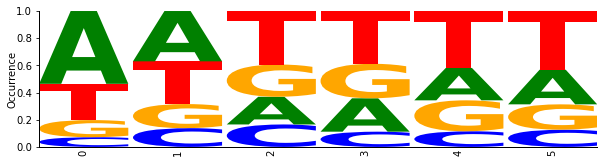

sensitive_significant_resistant_10k_variants_variable_6mersmult_logo


<Figure size 432x288 with 0 Axes>

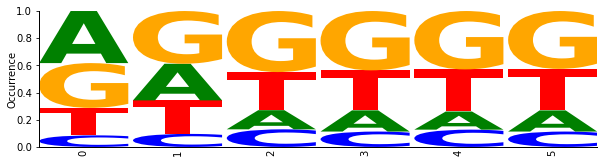

<Figure size 432x288 with 0 Axes>

In [3]:
# Normalize SVLst data based on variant
SVLst_PAS_percentage_normalized = merged_PAS_percentage_SVLst.drop("PAS", 1)
SVLst_PAS_percentage_normalized = SVLst_PAS_percentage_normalized.div(SVLst_PAS_percentage_normalized.sum(axis=1), axis=0)
SVLst_PAS_percentage_normalized["PAS"] = merged_PAS_percentage_SVLst["PAS"]
print("SVLst_PAS_percentage_normalized: ", SVLst_PAS_percentage_normalized)

# Sort descending 12.5 uM percentage, aka sorted on resistance
SVLst_descending_PAS_percentage = SVLst_PAS_percentage_normalized.sort_values(by=["12p5uM_percent"], ascending=False)
print(SVLst_descending_PAS_percentage)

# Take top 10000 resistant variants
resistant_10k_variants = SVLst_descending_PAS_percentage.head(10000)
print(resistant_10k_variants)

# Take top 10000 sensitive variants
sensitive_10k_variants = SVLst_descending_PAS_percentage.tail(10000)
print(sensitive_10k_variants)

# Decompose n-mers for the top and bottom 10k variants
# 6-mers
resistant_10k_variants_variable_seqs = [seq[76:103] for seq in resistant_10k_variants["PAS"]]
resistant_10k_variants_variable_6mers = count_kmers_seqlist(resistant_10k_variants_variable_seqs, 6)
resistant_6mers_counts = pd.DataFrame(list(resistant_10k_variants_variable_6mers.items()),columns = ['6-mer', "resistant_count"])
print(resistant_6mers_counts)

sensitive_10k_variants_variable_seqs = [seq[76:103] for seq in sensitive_10k_variants["PAS"]]
sensitive_10k_variants_variable_6mers = count_kmers_seqlist(sensitive_10k_variants_variable_seqs, 6)
sensitive_6mers_counts = pd.DataFrame(list(sensitive_10k_variants_variable_6mers.items()),columns = ['6-mer', "sensitive_count"])
print(sensitive_6mers_counts)

merged_6mers_counts = resistant_6mers_counts.merge(sensitive_6mers_counts, how='outer', on="6-mer")
merged_6mers_counts = merged_6mers_counts.fillna(0)
merged_6mers_counts.set_index("6-mer", inplace = True)
print(merged_6mers_counts)

plt.scatter(merged_6mers_counts["resistant_count"], merged_6mers_counts["sensitive_count"])
plt.title("6-mers of SVLst resistant vs. sensitive, top 10k each")
plt.ylabel("SVLst sensitive 6-mers count")
plt.xlabel("SVLst resistant 6-mers count")
plt.savefig(output_dir + "SVLst_10k_variants_variable_6mers.pdf")
plt.show()
plt.clf()


resistant_significant_resistant_10k_variants_variable_6mers = find_significant_kmers(resistant_10k_variants_variable_6mers)
print(resistant_significant_resistant_10k_variants_variable_6mers)
print(len(resistant_significant_resistant_10k_variants_variable_6mers))

sensitive_significant_resistant_10k_variants_variable_6mers = find_significant_kmers(sensitive_10k_variants_variable_6mers)
print(sensitive_significant_resistant_10k_variants_variable_6mers)
print(len(sensitive_significant_resistant_10k_variants_variable_6mers))


resistant_significant_resistant_10k_variants_variable_6mersmult = list(OSU.flatten_list([[mer]*count for mer, count in resistant_10k_variants_variable_6mers.items() \
                                                                       if mer in resistant_significant_resistant_10k_variants_variable_6mers]))
sensitive_significant_resistant_10k_variants_variable_6mersmult = list(OSU.flatten_list([[mer]*count for mer, count in sensitive_10k_variants_variable_6mers.items() \
                                            if mer in sensitive_significant_resistant_10k_variants_variable_6mers]))

# Make sequence logo of probabilities in high_resistant_10k_variants_variable_6mersmult and low_resistant_10k_variants_variable_6mersmult
resistant_significant_resistant_10k_variants_variable_6mersmult_probs = make_probabillity_df(resistant_significant_resistant_10k_variants_variable_6mersmult)
sensitive_significant_resistant_10k_variants_variable_6mersmult_probs = make_probabillity_df(sensitive_significant_resistant_10k_variants_variable_6mersmult)

print(resistant_significant_resistant_10k_variants_variable_6mersmult_probs)
print(sensitive_significant_resistant_10k_variants_variable_6mersmult_probs)

print("resistant_significant_resistant_10k_variants_variable_6mersmult_logo")
# create Logo object
resistant_significant_resistant_10k_variants_variable_6mersmult_logo = logomaker.Logo(resistant_significant_resistant_10k_variants_variable_6mersmult_probs,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold')

# style using Logo methods
resistant_significant_resistant_10k_variants_variable_6mersmult_logo.style_spines(visible=False)
resistant_significant_resistant_10k_variants_variable_6mersmult_logo.style_spines(spines=['left', 'bottom'], visible=True)
resistant_significant_resistant_10k_variants_variable_6mersmult_logo.style_xticks(rotation=90, fmt='%d', anchor=0)

# style using Axes methods
resistant_significant_resistant_10k_variants_variable_6mersmult_logo.ax.set_ylabel("Occurrence", labelpad=-1)
resistant_significant_resistant_10k_variants_variable_6mersmult_logo.ax.xaxis.set_ticks_position('none')
resistant_significant_resistant_10k_variants_variable_6mersmult_logo.ax.xaxis.set_tick_params(pad=-1)

plt.savefig(output_dir + "SVLst_resistant_significant_10k_variants_variable_6mersmult_logo.pdf")
plt.show()
plt.clf()

print("sensitive_significant_resistant_10k_variants_variable_6mersmult_logo")
# create Logo object
sensitive_significant_resistant_10k_variants_variable_6mersmult_logo = logomaker.Logo(sensitive_significant_resistant_10k_variants_variable_6mersmult_probs,
                          shade_below=.5,
                          fade_below=.5,
                          font_name='Arial Rounded MT Bold')

# style using Logo methods
sensitive_significant_resistant_10k_variants_variable_6mersmult_logo.style_spines(visible=False)
sensitive_significant_resistant_10k_variants_variable_6mersmult_logo.style_spines(spines=['left', 'bottom'], visible=True)
sensitive_significant_resistant_10k_variants_variable_6mersmult_logo.style_xticks(rotation=90, fmt='%d', anchor=0)

# style using Axes methods
sensitive_significant_resistant_10k_variants_variable_6mersmult_logo.ax.set_ylabel("Occurrence", labelpad=-1)
sensitive_significant_resistant_10k_variants_variable_6mersmult_logo.ax.xaxis.set_ticks_position('none')
sensitive_significant_resistant_10k_variants_variable_6mersmult_logo.ax.xaxis.set_tick_params(pad=-1)

plt.savefig(output_dir + "SVLst_sensitive_significant_10k_variants_variable_6mersmult_logo.pdf")
plt.show()
plt.clf()